## Variables ecómicas

Unión de las variables economicas en la variable *df_var*

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
import matplotlib.font_manager

# Preprocesado y modelado
# ==============================================================================
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import multiprocessing


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r df_mex         #Invesion_ES.pynb
%store -r df_desempleo   #edit_Desempleo.pynb
%store -r df_IED         #edit_IED.pynb
%store -r df_IPC         #edit_IPC.pynb
%store -r df_reservas    #edit_reservas.pynb
%store -r df_deuda       #edit_deuda.pynb
%store -r df_interes
%store -r df_balanzapagos 
%store -r df_import
%store -r df_export
%store -r df_PIB

no stored variable #Invesion_ES.pynb
no stored variable #edit_Desempleo.pynb
no stored variable #edit_IED.pynb
no stored variable #edit_IPC.pynb
no stored variable #edit_reservas.pynb
no stored variable #edit_deuda.pynb


In [3]:
df_var = pd.concat([df_IPC,df_desempleo,df_mex,df_IED,df_reservas,df_deuda,df_interes, df_balanzapagos, df_import, df_export, df_PIB], axis=1)

In [4]:
df_var

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB(millones€)
1993,9.75,3.37,94.32,3903.58,22500.67,117269.60,18.23,-20811.96,60076.30,46147.41,445354.66
1994,6.97,4.44,34.05,8807.63,5170.50,112309.71,19.30,-23809.78,65810.16,48869.98,423675.69
1995,35.00,7.10,16.53,7113.28,12727.92,124500.30,59.43,-1177.13,55574.64,59394.01,268867.19
1996,34.38,5.47,27.26,7275.91,15467.27,124821.36,36.39,-1986.39,72856.57,76041.60,325533.77
1997,20.63,4.24,93.71,11720.02,26356.74,135969.78,22.14,-7001.92,103336.03,100878.72,457127.72
1998,15.93,3.73,71.46,10876.42,27166.55,136569.31,26.36,-13635.34,110046.79,100146.40,448895.72
1999,16.59,2.60,100.38,13837.88,31592.87,166731.61,23.74,-13896.14,145002.98,135381.71,595791.15
2000,9.49,2.65,140.04,19505.44,37751.05,161879.29,16.93,-19898.19,190429.25,176532.02,751159.85
2001,6.37,2.63,70.30,33742.37,50293.24,186407.40,12.80,-19927.19,194236.28,177969.01,849402.82
2002,5.03,3.00,61.56,22910.10,48259.49,149787.48,8.21,-14168.26,164848.06,153033.54,735354.12


In [5]:
df_var.index = pd.to_datetime(df_var.index ).year

In [6]:
df_var.isna().sum()

variables
IPC(%anual)                       0
Desempleo (%)                     0
Inversion Es(millones€)           0
IED(millones€)                    0
Total de reservas(millones€)      0
Deuda Externa(millones€)          0
Tasa de interés(%)                0
Saldo Balanza Pagos(millones€)    0
Importaciones(millones€)          0
Exportaciones(millones€)          0
PIB(millones€)                    0
dtype: int64

In [7]:
df_var.to_csv('df_var.csv')

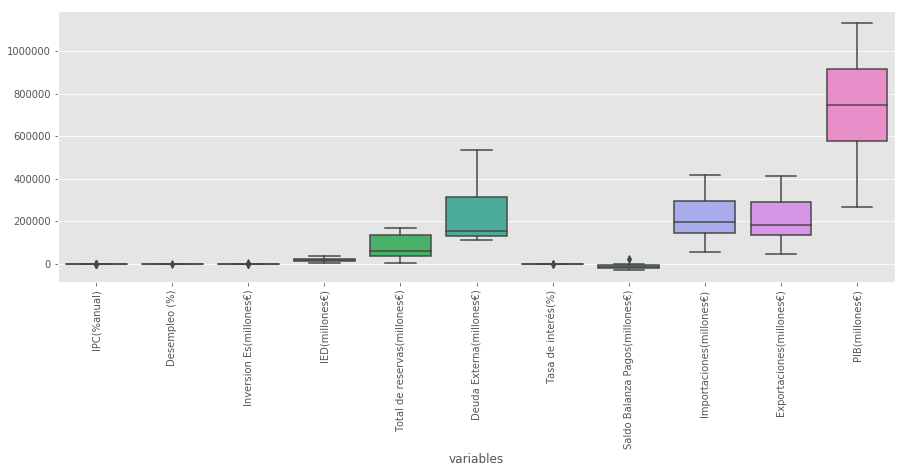

In [8]:
#Boxplot 
plt.figure(figsize=(15,5))
sns.boxplot(data = df_var)
plt.xticks(rotation=90)
plt.show()


In [9]:
#StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_var.values)
df_var_scaled = pd.DataFrame(scaled_features, index=df_var.index, columns=df_var.columns)



In [10]:
#Elimnar valores atípicos

df_var_clean = df_var_scaled[df_var_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
print(df_var_clean.shape)

(24, 11)


In [11]:
%store df_var_clean

Stored 'df_var_clean' (DataFrame)


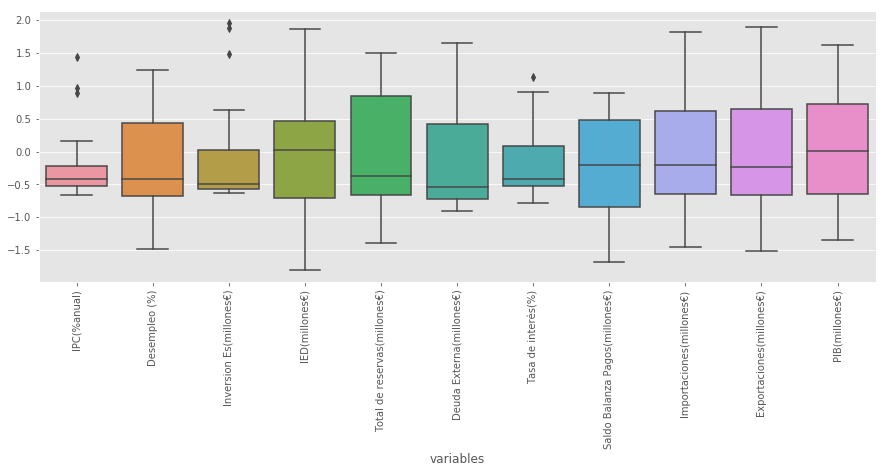

In [12]:
#Boxplot 
plt.figure(figsize=(15,5))
sns.boxplot(data = df_var_clean)
plt.xticks(rotation=90)
plt.show()


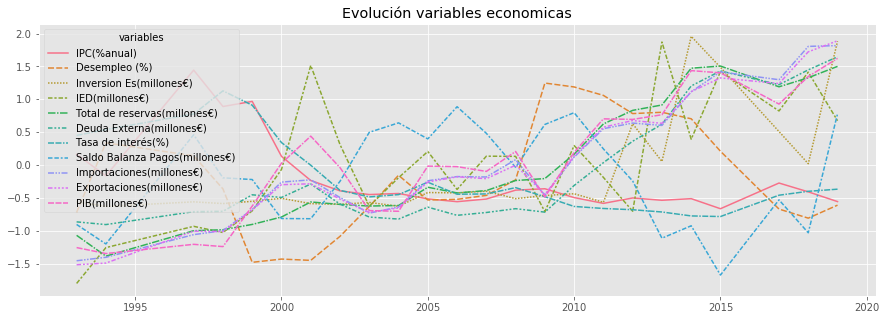

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_var_clean)
plt.title('Evolución variables economicas')
plt.show()

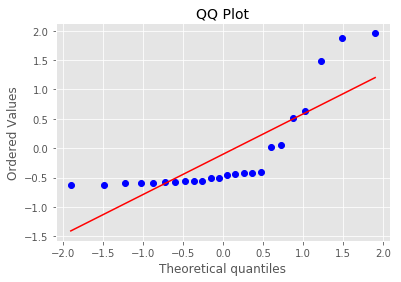

In [14]:
scipy.stats.probplot(df_var_clean['Inversion Es(millones€)'], plot =  plt)
plt.title("QQ Plot", size = 14)

plt.show()

**QQ Plot (Quantile - Quantile)**

los valores estan alejados de la media. No sigue una ditribución normal, sigue una distribución exponencial


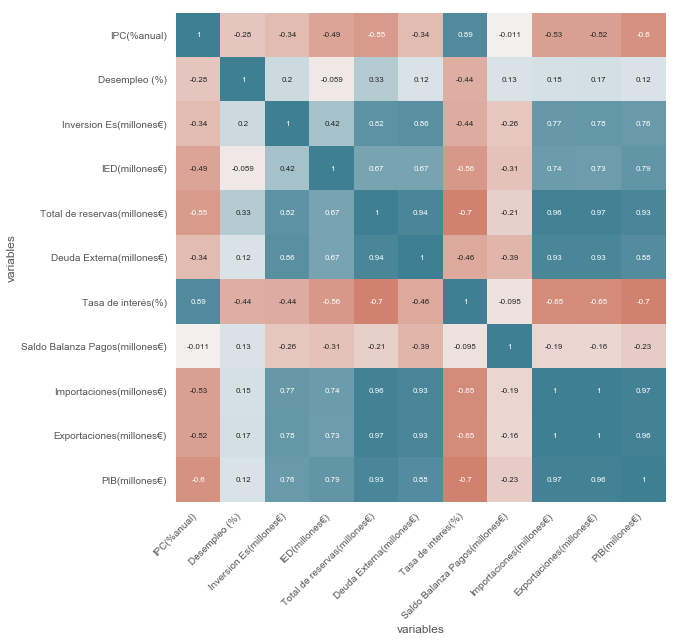

In [66]:
fig, ax = plt.subplots(figsize=(12,9)) 

sns.heatmap(df_var_clean.corr(),
            annot     = True,
            cbar      = False,
            annot_kws = {"size": 8},
            vmin      = -1,
            vmax      = 1,
            center    = 0,
            cmap      = sns.diverging_palette(20, 220, n=200),
            square    = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


In [18]:
corr = df_var_clean.corr()
corr[['Inversion Es(millones€)']].sort_values(by = 'Inversion Es(millones€)',ascending = False).style.background_gradient(cmap='YlOrRd')


variables,Inversion Es(millones€)
variables,
Inversion Es(millones€),1.000000
Deuda Externa(millones€),0.857031
Total de reservas(millones€),0.824336
Exportaciones(millones€),0.775435
Importaciones(millones€),0.770454
PIB(millones€),0.757251
IED(millones€),0.423066
Desempleo (%),0.201579
Saldo Balanza Pagos(millones€),-0.262383


Total de reservas, deuda externa, importaciones y exportaciones están altamente relacionadas con Inversión ES.

IED y PIB están ligeramente correlacionadas con Inversion ES

Cuanto más sesgado (-1,1), mayor es el coeficiente de correlación.
Cuando el coeficiente de correlación de Pearson está entre 0,4 y 0,6, significa que hay una correlación moderada entre las variables; cuando el coeficiente de correlación está por encima de 0,6, refleja que hay una fuerte correlación entre las variables.

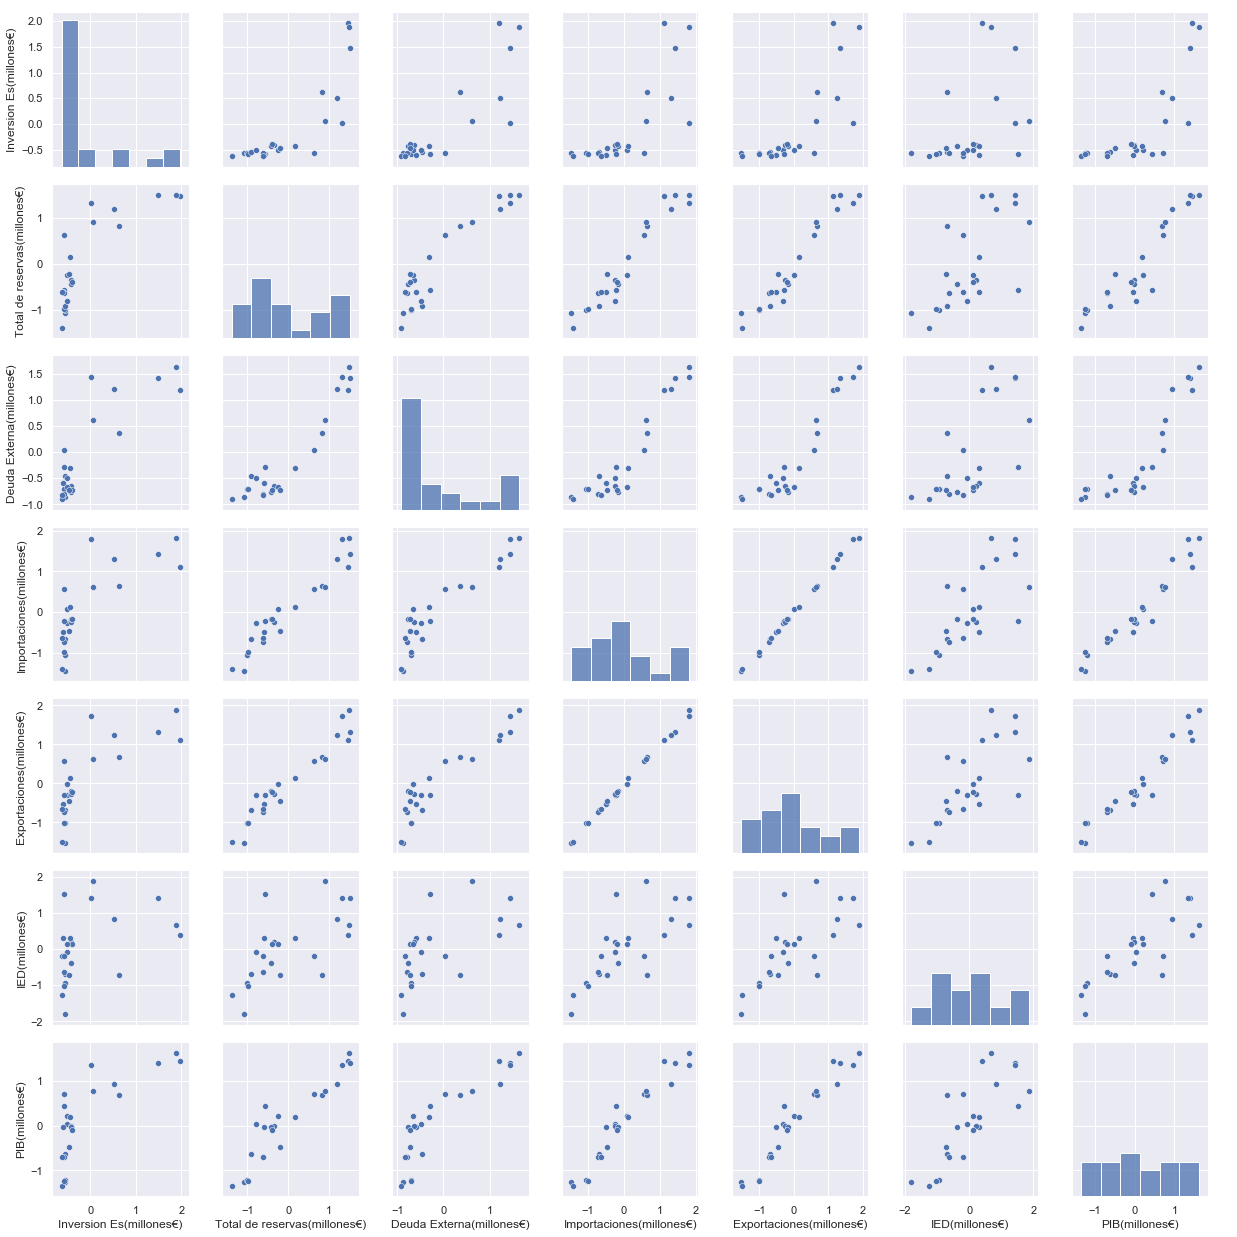

In [19]:
sns.set()
cols = ['Inversion Es(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Importaciones(millones€)', 'Exportaciones(millones€)', 'IED(millones€)', 'PIB(millones€)']

sns.pairplot(df_var_clean[cols], size = 2.5)
plt.show();

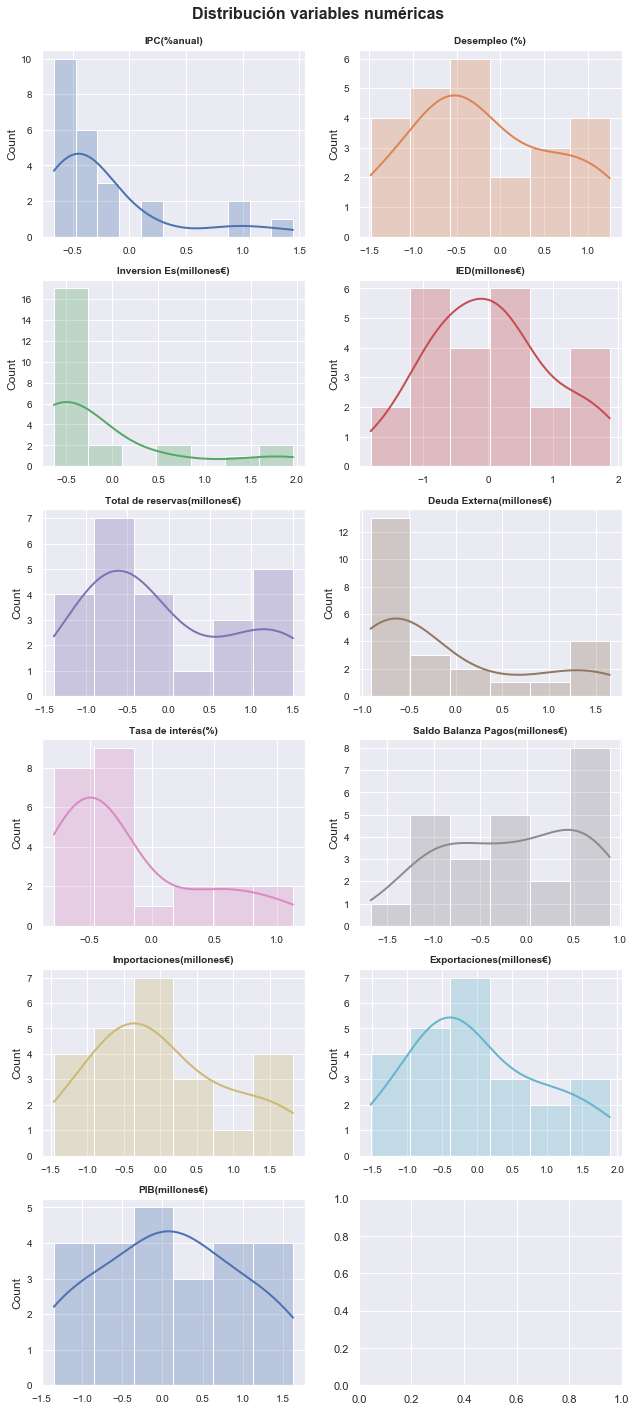

In [20]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(9, 20))
axes = axes.flat
columnas_numeric = df_var_clean.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_var_clean,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución variables numéricas', fontsize = 16, fontweight = "bold")
print()   ;

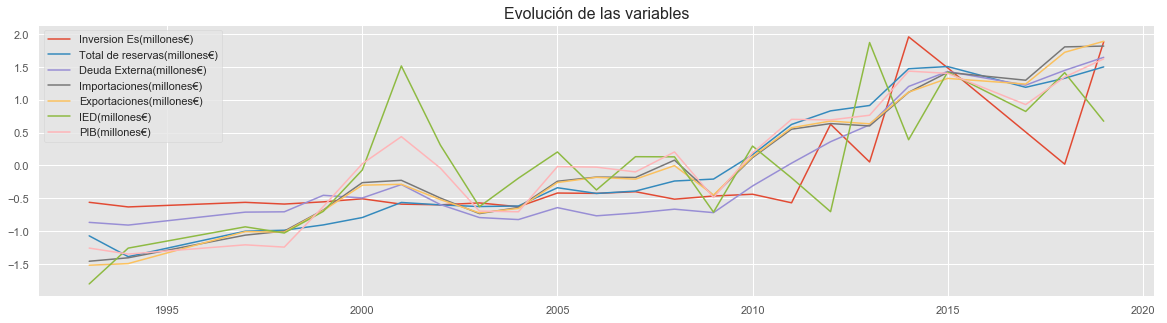

In [95]:
#Plot de las variables con mayor correlación

df_var_clean['Inversion Es(millones€)'].plot(figsize = (20,5))
df_var_clean['Total de reservas(millones€)'].plot()
df_var_clean['Deuda Externa(millones€)'].plot()
df_var_clean['Importaciones(millones€)'].plot()
df_var_clean['Exportaciones(millones€)'].plot()
df_var_clean['IED(millones€)'].plot()
df_var_clean['PIB(millones€)'].plot()

plt.title("Evolución de las variables", size = 16)
plt.legend() 
plt.show()



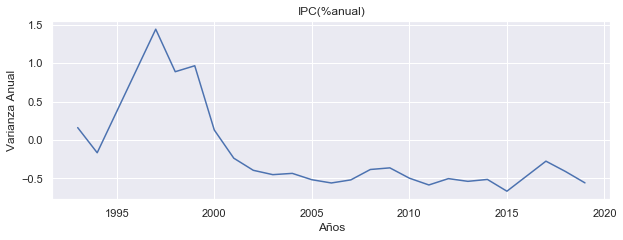

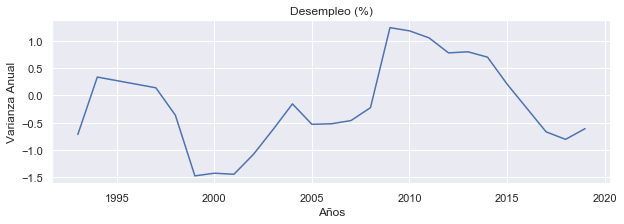

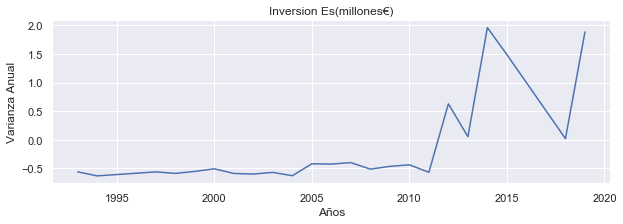

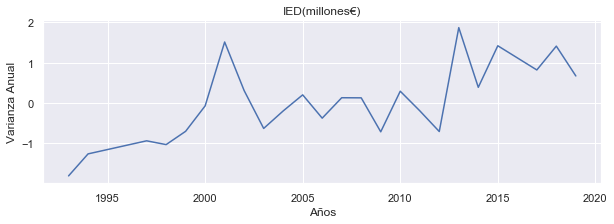

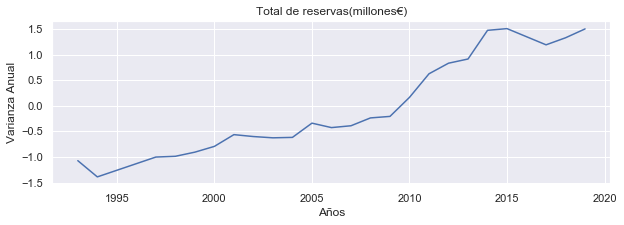

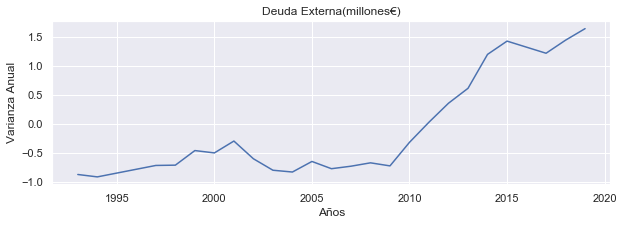

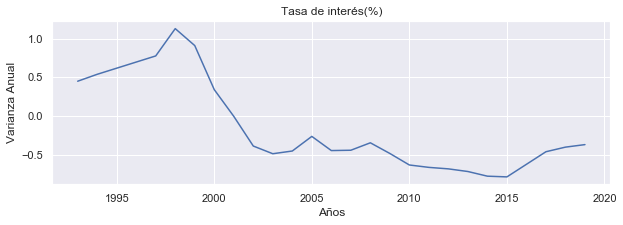

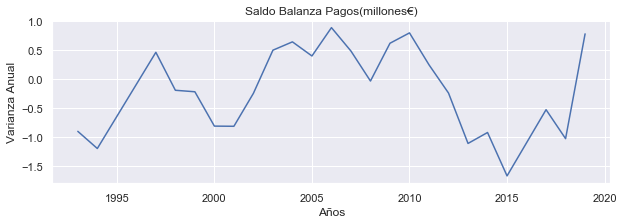

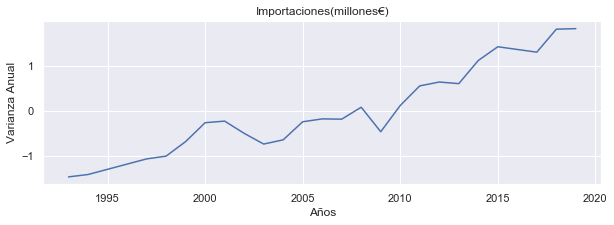

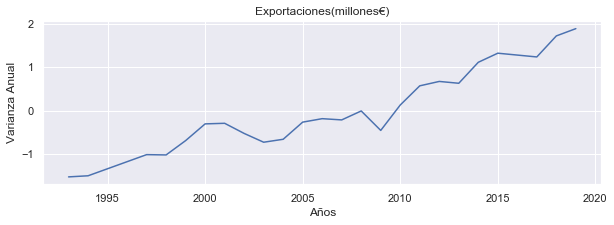

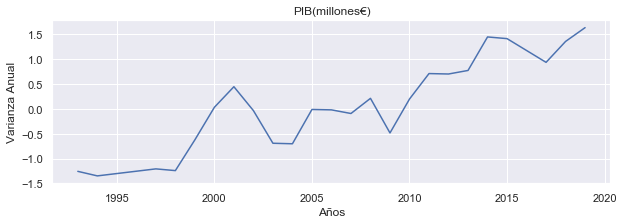

In [41]:
#Representación gráfica con plots

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución variables numéricas', fontsize = 16, fontweight = "bold")

cols = df_var_clean.columns.values.tolist()
for i in range(0,len(df_var_clean.columns)):
    df_var_clean[cols[i]].plot(figsize = (10,3))
    plt.xlabel("Años")
    plt.ylabel("Varianza Anual")
    plt.title(str(df_var_clean[cols[i]].name))
    plt.show()


# Regresión Lineal Múltiple

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html


In [42]:
# División de los datos en train y test
X = df_var_clean[['IPC(%anual)', 'Desempleo (%)', 'IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Tasa de interés(%)', 'Saldo Balanza Pagos(millones€)','Importaciones(millones€)', 'Exportaciones(millones€)','PIB(millones€)'   ]]
y = df_var_clean['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [43]:
# Creación del modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     Inversion Es(millones€)   R-squared:                       0.938
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     10.54
Date:                     Mon, 12 Jul 2021   Prob (F-statistic):            0.00249
Time:                             11:09:30   Log-Likelihood:                 2.1255
No. Observations:                       18   AIC:                             17.75
Df Residuals:                            7   BIC:                             27.54
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Acorde al p-value obtenido para el coeficiente parcial de regresión de PIB (0.654), esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo el predictor 'PIB'.

In [44]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.626035,0.313473
IPC(%anual),-1.802083,2.089773
Desempleo (%),-0.844940,0.697314
IED(millones€),-1.347333,0.340214
Total de reservas(millones€),-4.209038,4.639447
Deuda Externa(millones€),-1.893136,4.726390
Tasa de interés(%),-3.262590,2.297634
Saldo Balanza Pagos(millones€),-0.599653,1.460351
Importaciones(millones€),-13.194375,15.974115
Exportaciones(millones€),-18.844821,12.088773


In [45]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

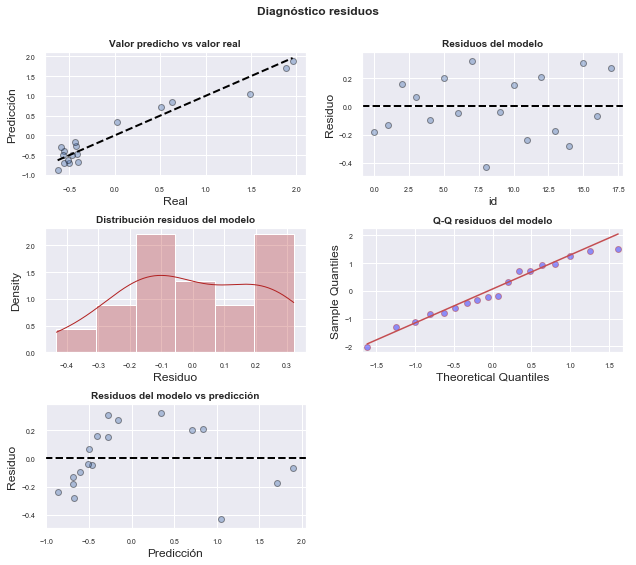

In [46]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [47]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9561225771903992, pvalue=0.5288498401641846)

In [48]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1.1049735206484266, p-value = 0.5755168569273128


In [49]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2000,-0.685426,0.285028,-1.359411,-0.011441,-1.743255,0.372404
1999,-0.688620,0.323223,-1.452921,0.075682,-1.806164,0.428924
1993,-0.403308,0.332156,-1.188732,0.382116,-1.535403,0.728786
2003,-0.502368,0.264697,-1.128278,0.123541,-1.530235,0.525498


## VIF (Factores de inflación de varianza)

Como podemos ver a primera vista, muchas de nuestras variables son dependientes entre si, por lo que nos encontramos con un problema de milticolinealidad.

Para solucionarlo, calcularemos el factor de inflacion de la varianza (VIF) e iremos eliminando aquellas variables que son dependientes entre si y aportan la misma información.


VIF = 1: ausencia total de colinealidad

1 < VIF < 5: la regresión puede verse afectada por cierta colinealidad.

5 < VIF < 10: la regresión puede verse altamente afectada por cierta colinealidad.

El término tolerancia es  1VIF  por lo que los límites recomendables están entre 1 y 0.1.

In [53]:
def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))
    
    return result

In [54]:
calculateVIF(X).T

,VIF
IPC(%anual),8.118633
Desempleo (%),3.800923
IED(millones€),3.849045
Total de reservas(millones€),127.218260
Deuda Externa(millones€),55.552659
Tasa de interés(%),19.903107
Saldo Balanza Pagos(millones€),7.024821
Importaciones(millones€),1487.712844
Exportaciones(millones€),1926.146284
PIB(millones€),36.308710


In [55]:
def selectDataUsingVIF(var_predictoras_df, max_VIF = 5):
    result = var_predictoras_df.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [56]:
calculateVIF(selectDataUsingVIF(X)).T

,VIF
IPC(%anual),1.550145
Desempleo (%),1.225013
IED(millones€),2.337653
Deuda Externa(millones€),2.059763
Saldo Balanza Pagos(millones€),1.254622


In [57]:
X = df_var_clean[['IPC(%anual)', 'Desempleo (%)', 'IED(millones€)', 
                 'Deuda Externa(millones€)', 'Saldo Balanza Pagos(millones€)']]
y = df_var_clean['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [58]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     Inversion Es(millones€)   R-squared:                       0.831
Model:                                 OLS   Adj. R-squared:                  0.761
Method:                      Least Squares   F-statistic:                     11.82
Date:                     Mon, 12 Jul 2021   Prob (F-statistic):           0.000268
Time:                             11:11:43   Log-Likelihood:                -6.8480
No. Observations:                       18   AIC:                             25.70
Df Residuals:                           12   BIC:                             31.04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

## PCA


Método de reducción de dimensionalidad para simplificar la complejidad de espacios con multiples dimensiones a la vez que conserva su informacion.
https://www.cienciadedatos.net/documentos/py19-pca-python.html

In [59]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [60]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_var_clean.mean(axis=0)

----------------------
Media de cada variable
----------------------


variables
IPC(%anual)                      -0.206706
Desempleo (%)                    -0.195528
Inversion Es(millones€)          -0.103142
IED(millones€)                    0.025086
Total de reservas(millones€)     -0.025461
Deuda Externa(millones€)         -0.104033
Tasa de interés(%)               -0.193222
Saldo Balanza Pagos(millones€)   -0.173401
Importaciones(millones€)          0.018000
Exportaciones(millones€)          0.000615
PIB(millones€)                    0.083769
dtype: float64

In [61]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_var_clean.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


variables
IPC(%anual)                       0.303316
Desempleo (%)                     0.696258
Inversion Es(millones€)           0.646144
IED(millones€)                    0.878840
Total de reservas(millones€)      0.882109
Deuda Externa(millones€)          0.756675
Tasa de interés(%)                0.319964
Saldo Balanza Pagos(millones€)    0.568347
Importaciones(millones€)          0.909374
Exportaciones(millones€)          0.916436
PIB(millones€)                    0.827206
dtype: float64

In [62]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_var_clean)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [63]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_var_clean.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
)

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB(millones€)
PC1,-0.243805,0.092407,0.305556,0.291770,0.369933,0.347353,-0.284868,-0.092523,0.367959,0.367444,0.368651
PC2,-0.421452,0.497199,-0.142431,-0.130617,0.003446,-0.246535,-0.452697,0.511574,-0.069507,-0.055296,-0.050018
PC3,-0.373323,-0.631936,-0.373327,0.445661,-0.172612,-0.191387,-0.208017,0.047980,-0.005999,-0.024346,0.103317
PC4,0.295255,-0.341529,0.115816,-0.105527,0.053755,0.074229,0.156769,0.809638,0.181675,0.209696,0.078514
PC5,0.438342,0.407691,-0.522297,0.572267,0.053886,0.003384,0.107555,0.087662,0.090863,0.101969,0.023206
PC6,-0.103589,-0.069196,-0.643992,-0.565813,0.168168,0.108127,0.061665,-0.156106,0.310190,0.281282,0.078293
PC7,-0.542993,0.203672,0.040255,0.133884,-0.208490,0.027397,0.752435,0.109381,0.108096,0.089571,0.045626
PC8,0.171574,0.084579,0.088358,-0.126592,-0.212469,-0.549322,0.035409,-0.094956,0.040916,0.052644,0.760238
PC9,0.058910,0.003029,0.190449,0.052992,-0.177022,-0.494042,-0.078316,-0.132161,0.524822,0.364987,-0.499773
PC10,-0.074524,-0.092374,0.017250,0.060508,0.824073,-0.463924,0.239059,-0.003125,-0.108423,-0.119187,-0.067176


PC1 = 0.27 IPC + 0.067 Desempleo -0.287 Inversion ES - 0.32 IED -0.366 Total Reservas - 0.32 Deuda Externa +0.29 Tasa de interes + 0.082 Balanza pagos - 0.371 Importaciones -0.36 Exportaciones -0.3533 PIB

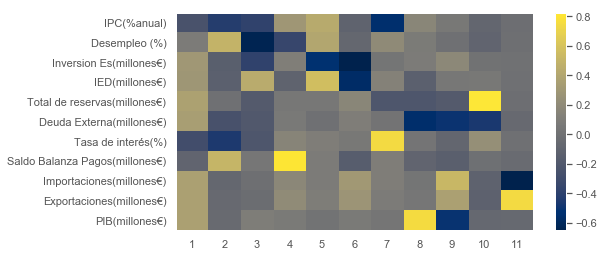

In [64]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='cividis', aspect='auto')
plt.yticks(range(len(df_var_clean.columns)), df_var_clean.columns)
plt.xticks(range(len(df_var_clean.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[6.34106897e-01 1.47033588e-01 8.68423062e-02 7.02552488e-02
 3.56379665e-02 1.41645732e-02 5.87817631e-03 4.56148205e-03
 9.88976581e-04 5.04665464e-04 2.61191774e-05]


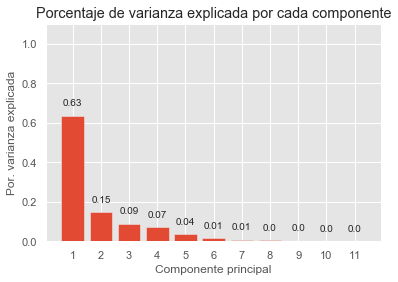

In [67]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_var_clean.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 63% de la varianza observada en los datos y la segunda el 15%. 

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.6341069  0.78114049 0.86798279 0.93823804 0.97387601 0.98804058
 0.99391876 0.99848024 0.99946922 0.99997388 1.        ]


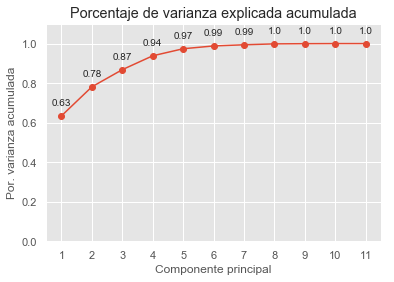

In [68]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_var.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_var_clean.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las seis primeras componentes se conseguiría explicar el 98% de la varianza observada.

In [69]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df_var_clean)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
    index   = df_var_clean.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1993,-3.688670,-0.806650,-0.548765,-0.929783,-1.168938,0.349366,-0.199639,-0.162793,-0.163098,0.102398,-0.013185
1994,-3.434849,-0.239662,-0.837823,-1.938881,-0.551271,0.070674,0.621771,-0.170880,0.035526,-0.161609,-0.002434
1997,-3.764390,-0.835768,-1.771411,1.117525,1.171225,-0.435240,-0.416664,0.030816,0.030315,-0.116275,-0.002771
1998,-3.694679,-1.438401,-1.214246,0.420628,0.423847,-0.010211,0.383191,-0.114451,0.069558,0.172273,0.005422
1999,-2.976476,-2.221810,-0.189970,1.024475,0.155702,0.126327,-0.134966,0.120679,-0.062078,0.025906,0.000406


In [71]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df_var_clean.columns,
                    index   = df_var_clean.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.tail())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(df_var_clean.tail())

------------------
Valores originales
------------------


variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB(millones€)
2014,-0.512705,0.703477,1.958296,0.392002,1.473368,1.203100,-0.775681,-0.925519,1.114233,1.116501,1.436553
2015,-0.665852,0.209066,1.486278,1.422271,1.506302,1.431707,-0.784865,-1.675610,1.417442,1.325609,1.402681
2017,-0.274739,-0.670987,0.509351,0.822610,1.190211,1.222639,-0.460101,-0.531257,1.297965,1.239665,0.927337
2018,-0.409036,-0.809423,0.019987,1.413188,1.328030,1.448020,-0.400826,-1.031907,1.805604,1.723121,1.346349
2019,-0.557471,-0.611658,1.883260,0.673795,1.501146,1.646638,-0.368266,0.779453,1.817762,1.890705,1.623160


---------------------
Valores reconstruidos
---------------------


variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB(millones€)
2014,-0.512705,0.703477,1.958296,0.392002,1.473368,1.203100,-0.775681,-0.925519,1.114233,1.116501,1.436553
2015,-0.665852,0.209066,1.486278,1.422271,1.506302,1.431707,-0.784865,-1.675610,1.417442,1.325609,1.402681
2017,-0.274739,-0.670987,0.509351,0.822610,1.190211,1.222639,-0.460101,-0.531257,1.297965,1.239665,0.927337
2018,-0.409036,-0.809423,0.019987,1.413188,1.328030,1.448020,-0.400826,-1.031907,1.805604,1.723121,1.346349
2019,-0.557471,-0.611658,1.883260,0.673795,1.501146,1.646638,-0.368266,0.779453,1.817762,1.890705,1.623160


## Principal Components Regression

consiste en ajustar un modelo de regresión lineal por mínimos cuadrados empleando como predictores las componentes generadas a partir de un Principal Component Analysis (PCA). De esta forma, con un número reducido de componentes se puede explicar la mayor parte de la varianza de los datos.

In [73]:
# División de los datos en train y test
# ==============================================================================
X = df_var_clean. drop(columns='Inversion Es(millones€)')
y = df_var_clean['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Las predicciones del modelo final se alejan en promedio 1.81 unidades del valor real.

# PCR
Para combinar PCA con regresión lineal, se crea un pipeline que combine ambos procesos. Dado que no se puede conocer a priori el número de componentes óptimo, se recurre a validación cruzada.

In [76]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [77]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [78]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = np.sqrt(mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones))


print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 1.8114771524450766


In [79]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=12), 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
4,8,-0.285299,0.347387,-0.029309,0.004655
5,10,-0.359263,0.580571,-0.017052,0.004826
0,1,-0.392410,0.446399,-0.265296,0.031217


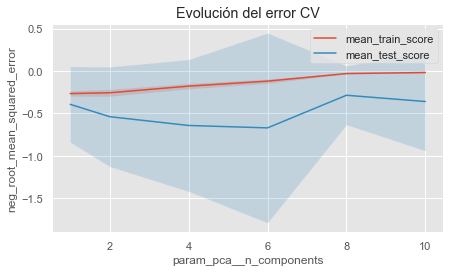

In [80]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [81]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 8} : -0.2852991250730813 neg_mean_squared_error


In [82]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [83]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = np.sqrt(mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones
           ))
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.76750579735248


Empleando las cinco primeras componentes del PCA como predictores en lugar de las variables originales, se consigue reducir el root mean squared error de 1.78 a 0.76.

## Modelo de Regresión, 5 primeras variables

- IPC
- Desempleo
- Inversion ES
- IED
- Reservas
- Deuda Externa

In [84]:
# División de los datos en train y test
X = df_var_clean[['IPC(%anual)', 'Desempleo (%)','IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)']]
y = df_var_clean['Inversion Es(millones€)']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [85]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     12.75
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           0.000124
Time:                        11:19:49   Log-Likelihood:                -6.7490
No. Observations:                  19   AIC:                             25.50
Df Residuals:                      13   BIC:                             31.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [55]:
from sinfo import sinfo
sinfo()


The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.0.2
numpy       1.19.2
pandas      0.23.4
patsy       0.5.1
scipy       1.1.0
seaborn     0.11.1
sinfo       0.3.4
sklearn     0.24.2
statsmodels 0.12.2
-----
IPython             7.2.0
jupyter_client      5.2.4
jupyter_core        4.7.0
jupyterlab          0.35.3
notebook            5.7.4
-----
Python 3.7.9 (default, Aug 31 2020, 12:42:55) [GCC 7.3.0]
Linux-4.15.0-143-generic-x86_64-with-debian-buster-sid
2 logical CPU cores, x86_64
-----
Session information updated at 2021-06-14 19:00
